In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
operation_type = "rent"
data_snapshot_date = "2025-01-13"

In [3]:
file_name = f"{data_snapshot_date}-lisbon-listings-for-{operation_type}.csv"

In [4]:
df = pd.read_csv(f'../data/processed/{file_name}', index_col='propertyCode')

In [5]:
df.head()

,floor,price,propertyType,size,rooms,bathrooms,address,province,municipality,district,...,hasLift,priceByArea,topNewDevelopment,topPlus,neighborhood,newDevelopmentFinished,formerPrice,priceChange,hasParkingSpace,isParkingSpaceIncludedInPrice
propertyCode,,,,,,,,,,,,,,,,,,,,,
33897215,3.0,760.0,flat,30.0,1,1,travessa da Cara,Lisboa,Misericórdia,Bairro Alto,...,False,25.0,False,False,NaN,NaN,760.0,0.0,False,False
33892870,NaN,850.0,studio,50.0,0,1,beco João Alves,Lisboa,Ajuda,Rio Seco - Casalinho,...,False,17.0,False,False,NaN,NaN,850.0,0.0,False,False
33897203,NaN,1807.0,studio,25.0,0,1,rua do Conde de Redondo,Lisboa,Santo António,Campo de Santana - Santa Marta,...,False,72.0,False,False,NaN,NaN,1807.0,0.0,False,False
33892869,NaN,1500.0,flat,180.0,3,2,rua de Entre-Muros,Lisboa,Santo Antão e São Julião do Tojal,NaN,...,False,8.0,False,False,NaN,NaN,1500.0,0.0,False,False
33897210,5.0,1200.0,flat,43.0,1,1,rua Giovanni Antinori,Lisboa,Ajuda,Rio Seco - Casalinho,...,True,28.0,False,False,NaN,NaN,1200.0,0.0,False,False


In [6]:
df.describe()

,floor,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea,formerPrice,priceChange
count,1620.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.624074,2504.831000,143.558000,2.219333,1.806333,38.734928,-9.197773,11816.033333,24.713333,2524.348667,19.517667
std,2.408558,2198.379415,1470.799405,1.217807,1.043962,0.129220,0.127586,14565.763024,18.787801,2208.446338,99.519079
min,-1.000000,550.000000,12.000000,0.000000,1.000000,37.957614,-9.482430,32.000000,0.000000,550.000000,0.000000
25%,1.000000,1350.000000,65.000000,1.000000,1.000000,38.705353,-9.252542,2554.750000,15.000000,1350.000000,0.000000
50%,2.000000,1850.000000,94.000000,2.000000,2.000000,38.718151,-9.161312,5369.500000,20.000000,1875.000000,0.000000
75%,3.000000,2700.000000,140.000000,3.000000,2.000000,38.744872,-9.136879,18873.750000,28.000000,2750.000000,0.000000
max,17.000000,25000.000000,80500.000000,15.000000,15.000000,39.541925,-8.559313,89903.000000,340.000000,25000.000000,2000.000000


<Axes: xlabel='price'>

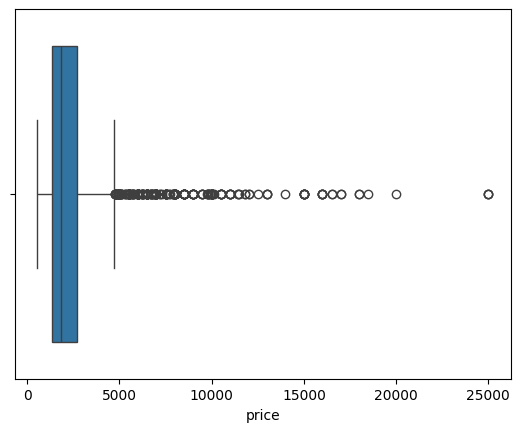

In [7]:
sns.boxplot(x=df['price'])

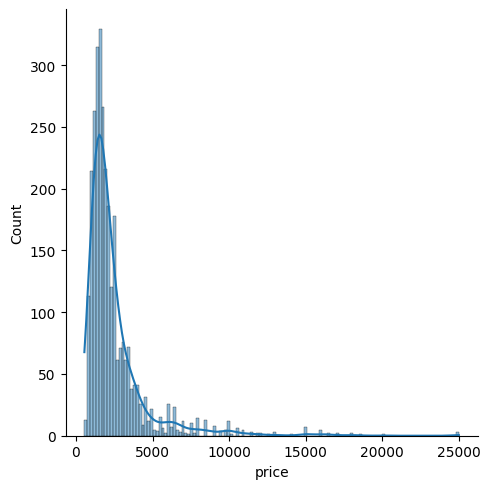

In [8]:
sns.displot(df['price'], kde=True)

In [9]:
df['logPrice'] = np.log(df['price'])

<Axes: xlabel='logPrice'>

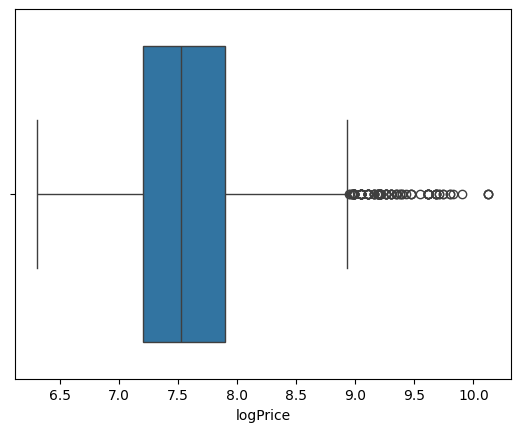

In [10]:
sns.boxplot(x=df['logPrice'])

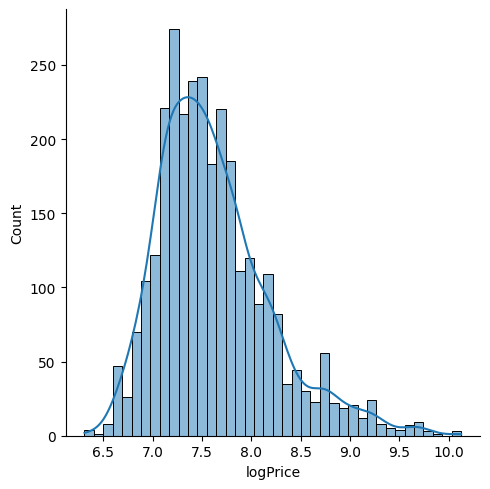

In [11]:
sns.displot(df['logPrice'], kde=True)

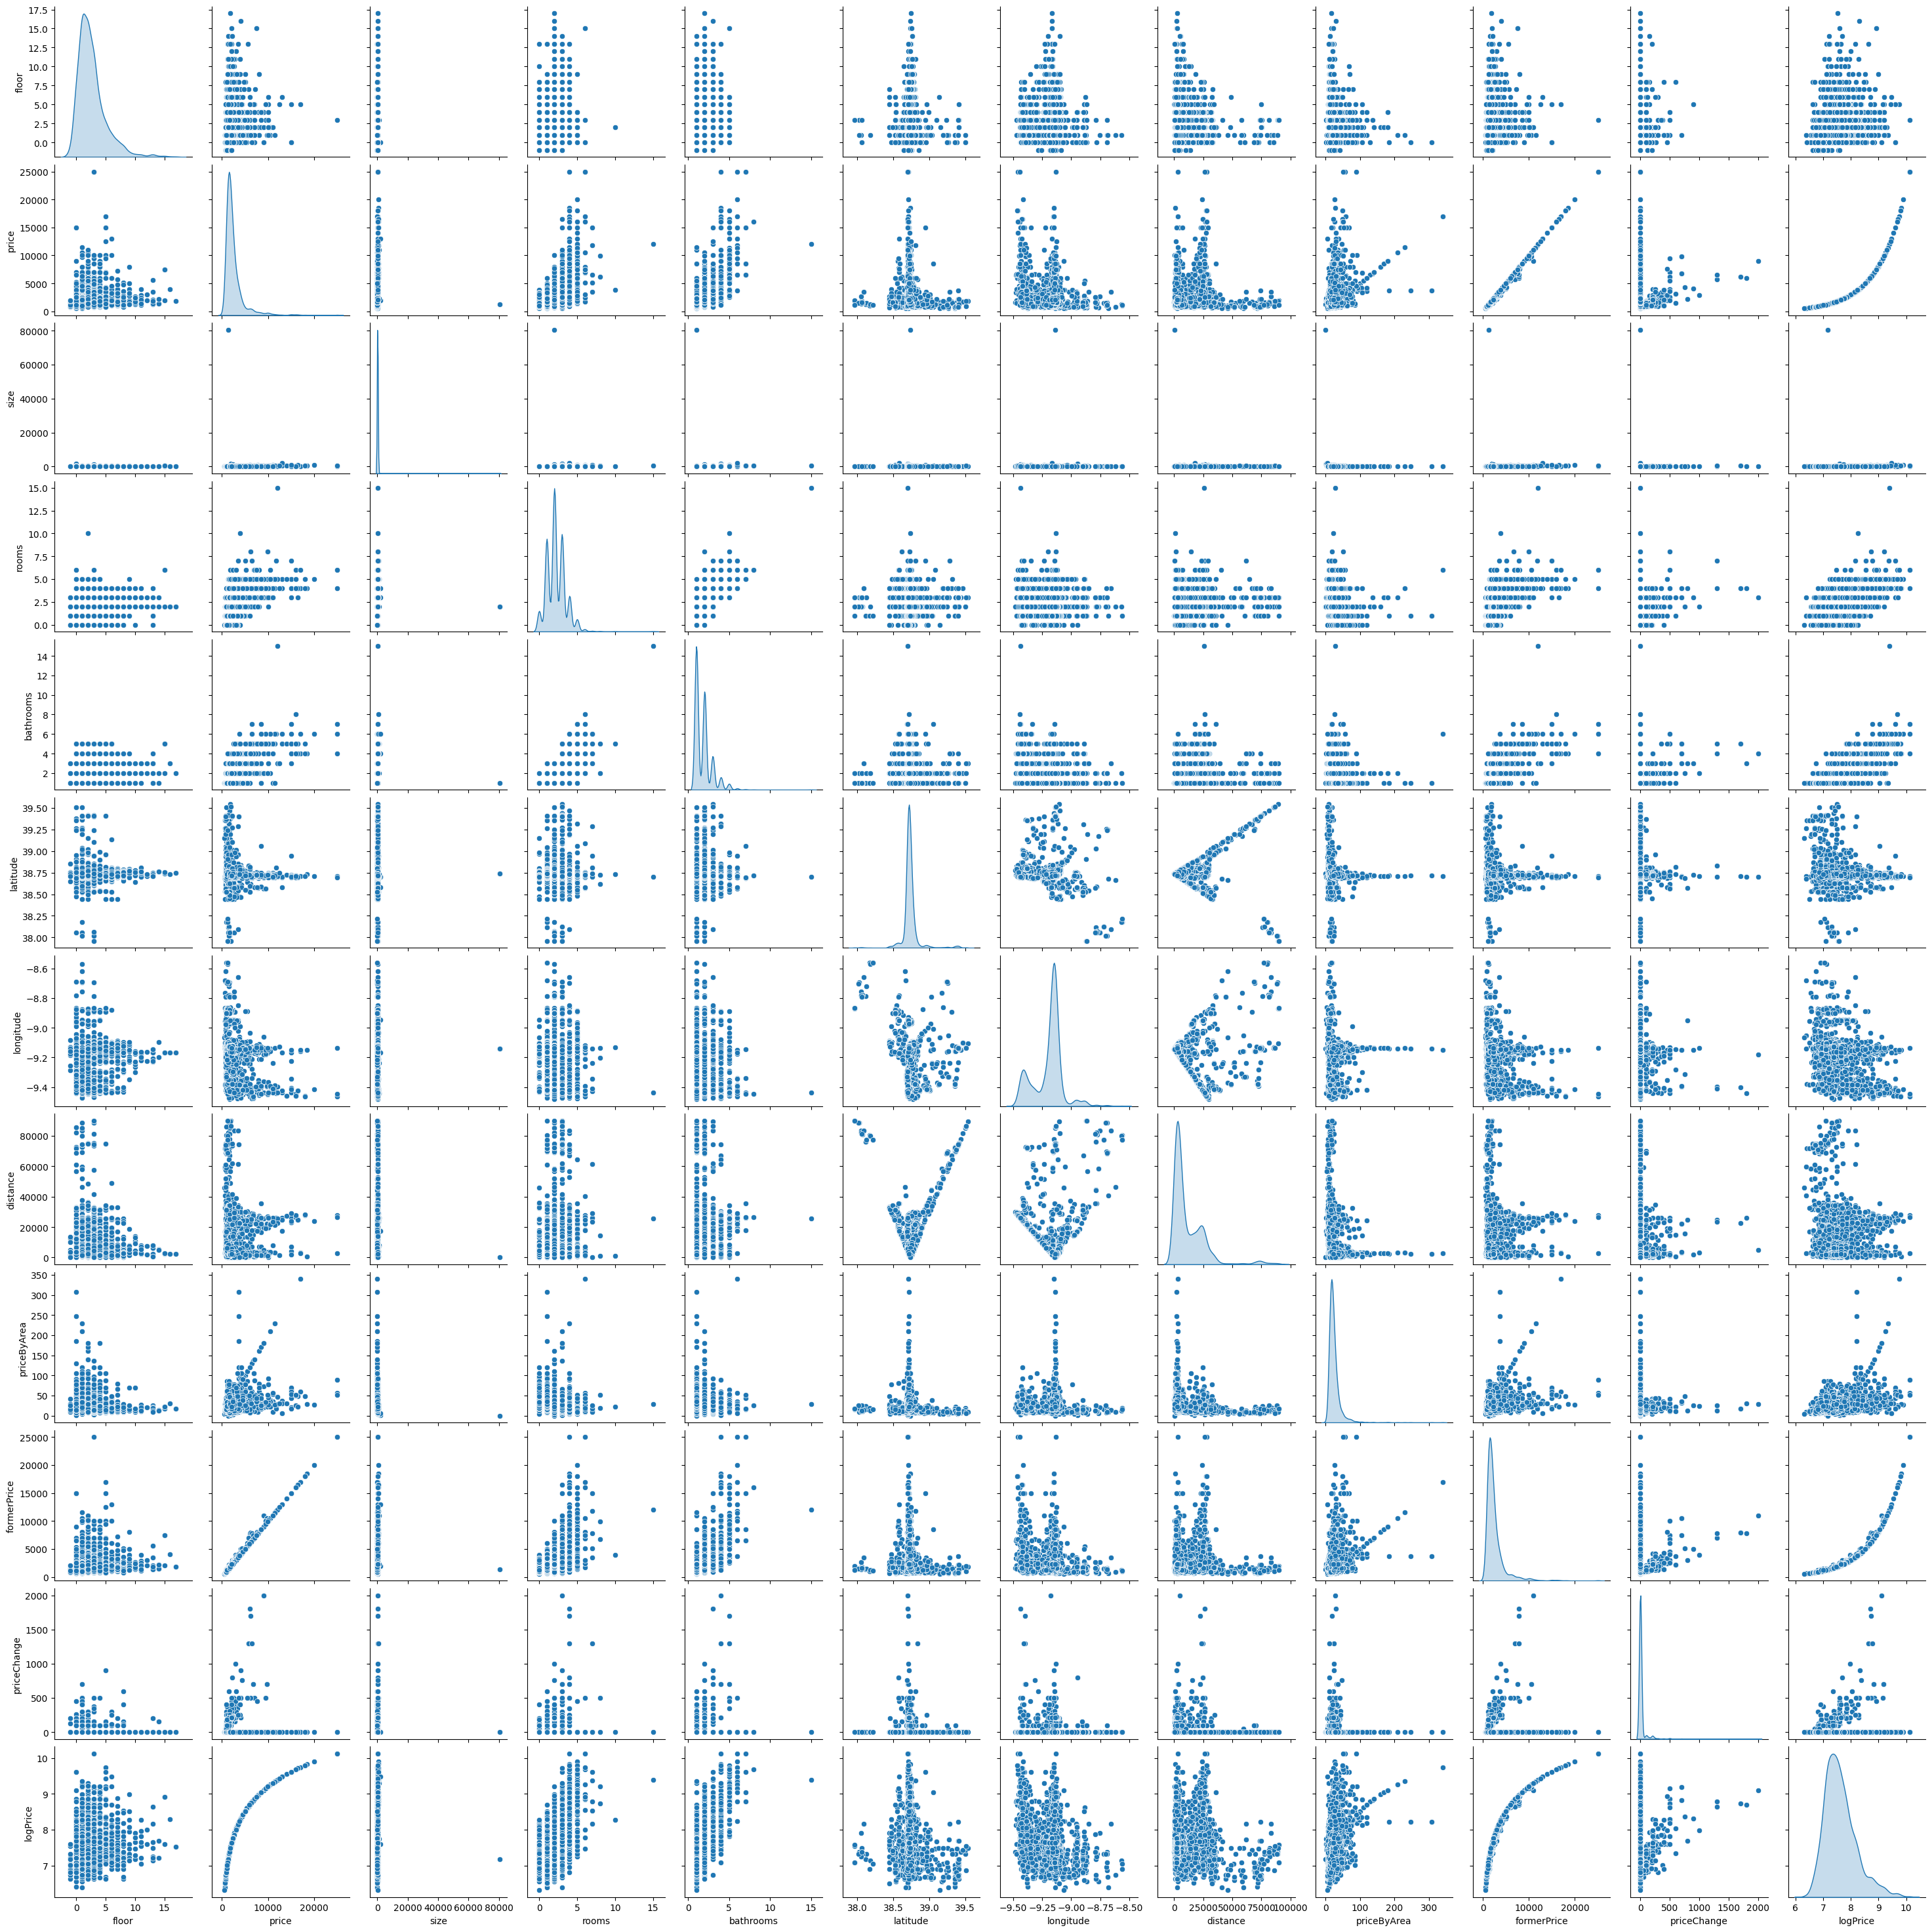

In [12]:
sns.pairplot(df.select_dtypes(include='number'), diag_kind='kde')

<Axes: >

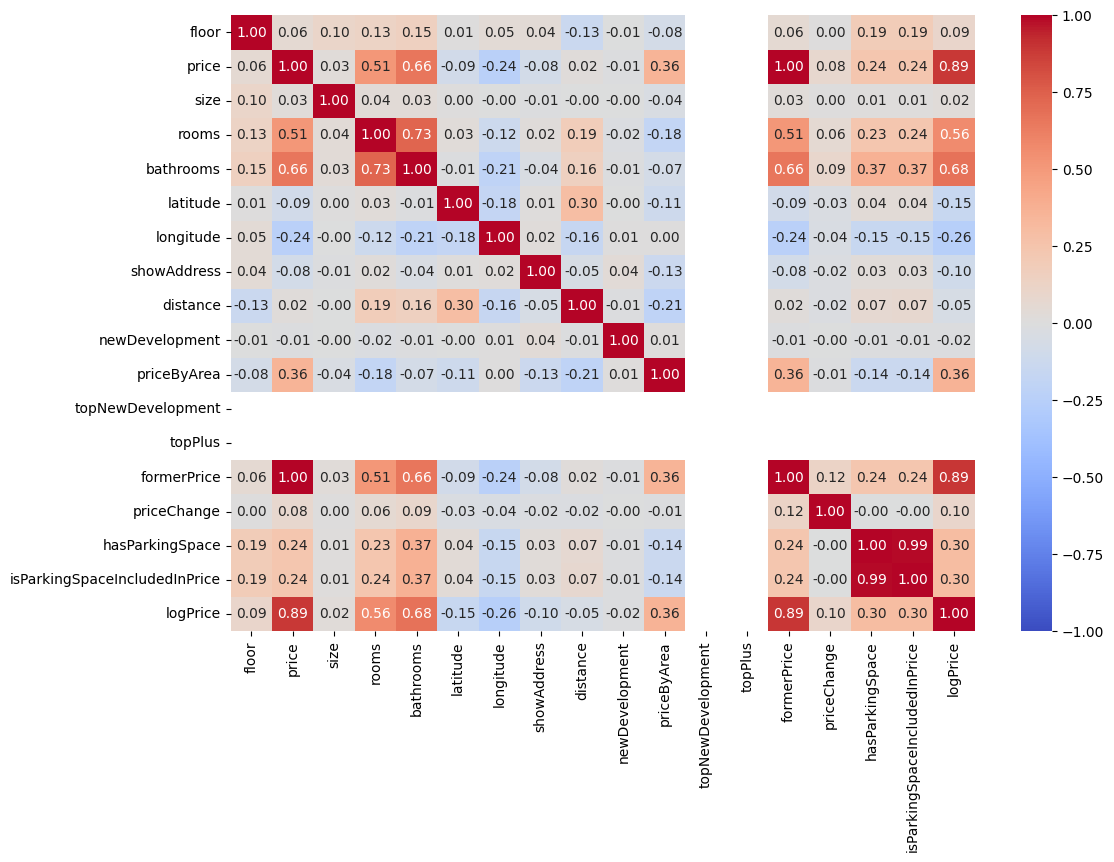

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', center=0, vmax=1, vmin=-1)

In [14]:
features = [
    "floor",
    "propertyType",
    "size",
    "rooms",
    "bathrooms",
    "address",
    "province",
    "municipality",
    "district",
    "country",
    "neighborhood",
    "latitude",
    "longitude",
    "showAddress",
    "url",
    "distance",
    "description",
    "status",
    "newDevelopment",
    "hasLift",
    "topNewDevelopment",
    "topPlus",
    "hasParkingSpace",
    "isParkingSpaceIncludedInPrice",
]
targets = ["price", "logPrice", "formerPrice", "priceChange", "priceByArea"]

<Axes: >

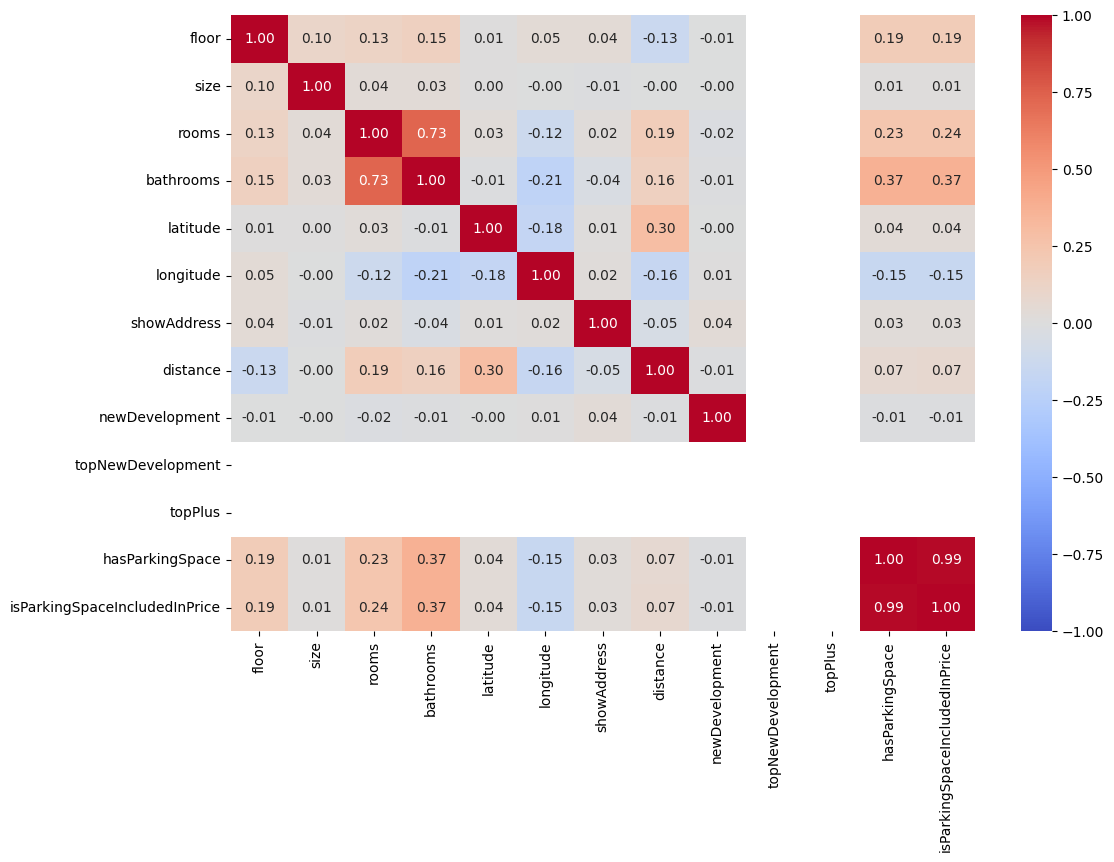

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', center=0, vmax=1, vmin=-1)

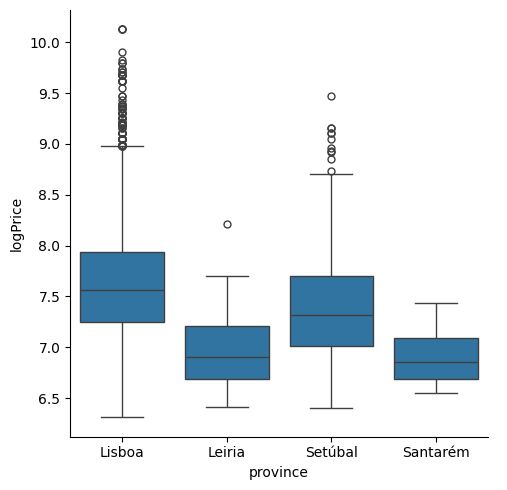

In [16]:

sns.catplot(x='province', y='logPrice', data=df, kind='box')

/var/folders/p1/pg83r7j563x7sxbrchzbfc140000gn/T/ipykernel_38877/949298217.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  municipality_count_plot.set_xticklabels(municipality_count_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Cascais e Estoril'),
 Text(1, 0, 'Santa Maria Maior'),
 Text(2, 0, 'Arroios'),
 Text(3, 0, 'Santo António'),
 Text(4, 0, 'Avenidas Novas'),
 Text(5, 0, 'Misericórdia'),
 Text(6, 0, 'Estrela'),
 Text(7, 0, 'Oeiras e São Julião da Barra - Paço de Arcos - Caxias'),
 Text(8, 0, 'São Vicente'),
 Text(9, 0, 'Penha de França'),
 Text(10, 0, 'Campolide'),
 Text(11, 0, 'São Domingos de Benfica'),
 Text(12, 0, 'Alvalade'),
 Text(13, 0, 'Carcavelos e Parede'),
 Text(14, 0, 'Lumiar'),
 Text(15, 0, 'Campo de Ourique'),
 Text(16, 0, 'Parque das Nações'),
 Text(17, 0, 'Alcântara'),
 Text(18, 0, 'Algés - Linda-a-Velha - Cruz Quebrada - Dafundo'),
 Text(19, 0, 'Ajuda'),
 Text(20, 0, 'Areeiro'),
 Text(21, 0, 'Benfica'),
 Text(22, 0, 'Belém'),
 Text(23, 0, 'Sintra'),
 Text(24, 0, 'Montijo e Afonsoeiro'),
 Text(25, 0, 'Alcabideche'),
 Text(26, 0, 'Charneca da Caparica e Sobreda'),
 Text(27, 0, 'Marvila'),
 Text(28, 0, 'São Domingos de Rana'),
 Text(29, 0, 'Ericeira'),
 Text(30, 0, 'Odivelas')

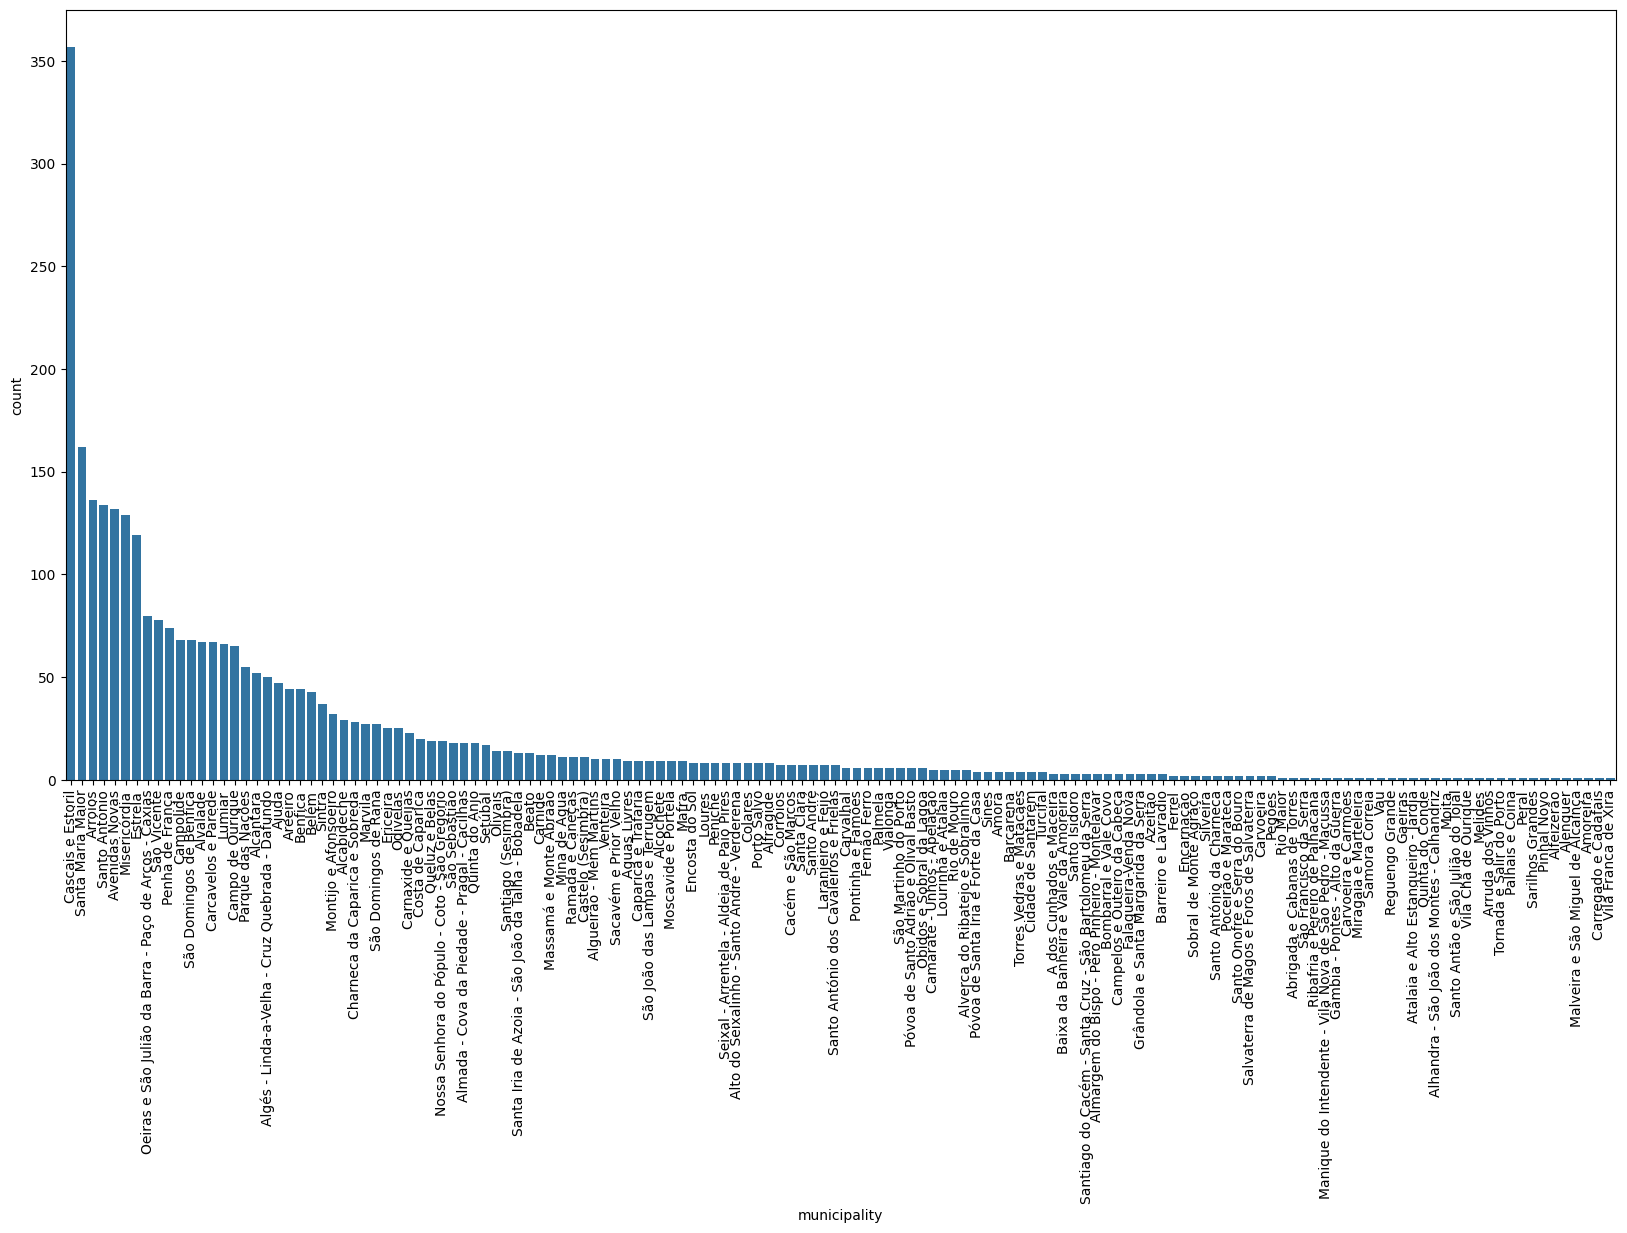

In [18]:
plt.figure(figsize=(20, 10))
municipality_count_plot = sns.countplot(
    x="municipality",
    data=df,
    order=df["municipality"].value_counts().index,
)
municipality_count_plot.set_xticklabels(municipality_count_plot.get_xticklabels(), rotation=90)